In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump, load

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/oil_dataset.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mendacium  1000 non-null   float64
 1   Depth      1000 non-null   float64
 2   Price      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


,Mendacium,Depth,Price
0,3.359,1722.533,74.048691
1,1.348,2062.571,83.321907


In [3]:
px.scatter_3d(df,x='Mendacium',y='Depth',z='Price', color='Price')

In [4]:
X = df[['Mendacium','Depth']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2, random_state=1)

In [15]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=20)

In [16]:
print("score:", model.score(xtest,ytest) * 100)
pred = model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 92.29600561477984
mse: 16.0345855687124
mae: 1.42536619113


<AxesSubplot:ylabel='Density'>

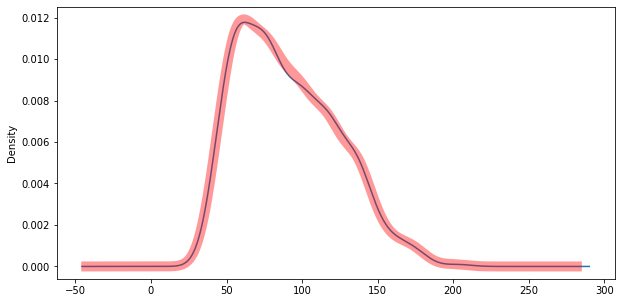

In [17]:
df['p1'] = pred
ax = df['Price'].plot(kind='kde',figsize=(10,5))
df['p1'].plot(kind='kde',ax=ax,alpha=.4, color='red',linewidth=10)

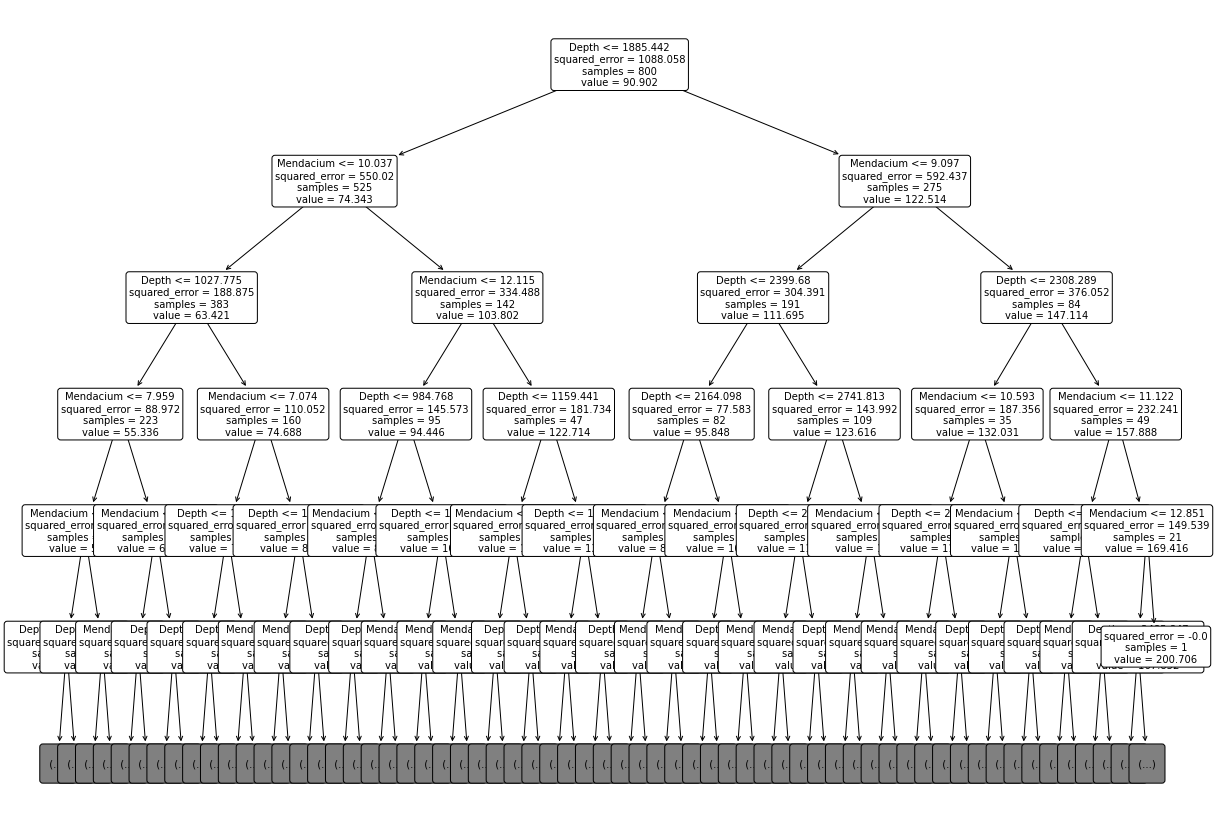

In [18]:
plt.figure(figsize=(20,15))
plot_tree(model,max_depth=5,fontsize=10,feature_names=['Mendacium','Depth'],rounded=True)
plt.show()

In [19]:
dump(model,'basic_oil_pricing.pkl')

['basic_oil_pricing.pkl']